In [1]:
import pandas as pd

In [2]:
Data = pd.read_csv("titanic_train.csv")

In [3]:
Data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [4]:
import seaborn as sns

In [5]:
gender = Data['Sex']

In [6]:
survived = Data['Survived']

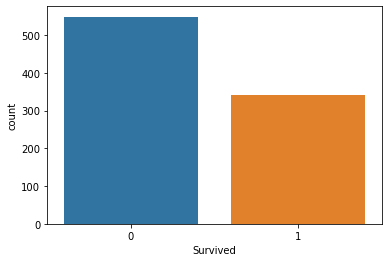

In [7]:
sns.countplot(survived)

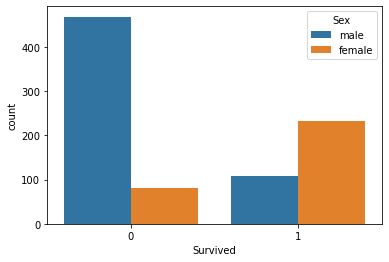

In [8]:
sns.countplot(survived, hue='Sex', data = Data)

In [9]:
pclass = Data['Pclass']

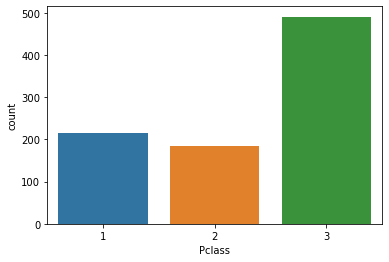

In [10]:
sns.countplot(pclass)

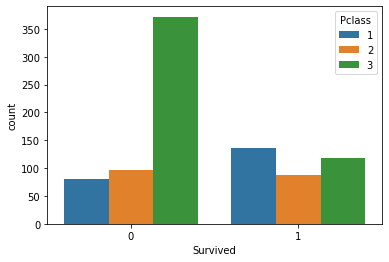

In [11]:
sns.countplot(survived, hue='Pclass', data = Data)

In [12]:
y = Data['Survived']

In [13]:
x = Data[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Cabin', 'Embarked']]

In [14]:
Data.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


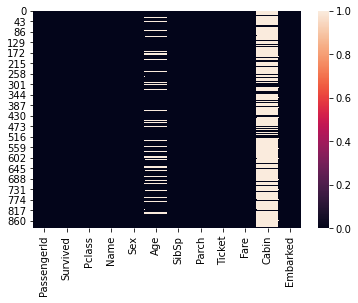

In [15]:
sns.heatmap(Data.isnull())

In [16]:
x.drop('Cabin',inplace=True, axis=1)

C:\Users\91991\anaconda3\lib\site-packages\pandas\core\frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [17]:
type(x)

pandas.core.frame.DataFrame

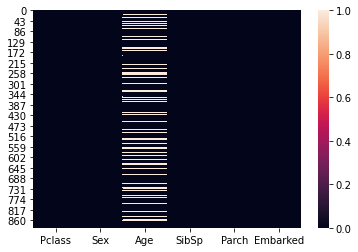

In [18]:
sns.heatmap(x.isnull())

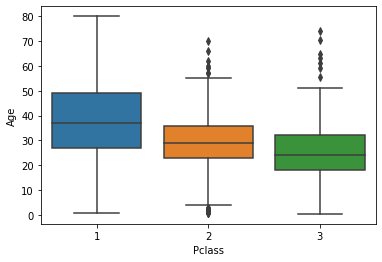

In [19]:
sns.boxplot(y="Age", x="Pclass", data = Data)

In [20]:
def Lw(cols):
    Pclass = cols[0]
    age = cols[1]
    
    if pd.isnull(age):
        if Pclass == 1:
            return 38
        elif Pclass == 2:
            return 30
        elif Pclass ==3:
            return 25
        else:
            return 30
    else:
        return age
        

In [21]:
age = Data[['Pclass', 'Age']].apply(Lw, axis=1)

In [22]:
age

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888    25.0
889    26.0
890    32.0
Length: 891, dtype: float64

In [23]:
x['Age'] = age

<ipython-input-23-f98533121b85>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x['Age'] = age


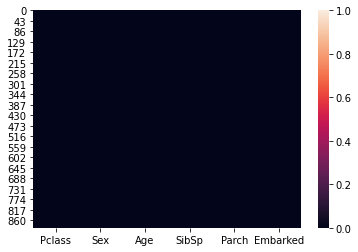

In [24]:
sns.heatmap(x.isnull())

In [25]:
sex = x['Sex']

In [26]:
sex = pd.get_dummies(sex, drop_first=True)

In [27]:
pclass = x['Pclass']

In [28]:
pclass = pd.get_dummies(pclass, drop_first=True)

In [29]:
sibsp = x['SibSp']

In [30]:
sibsp = pd.get_dummies(sibsp, drop_first=True)

In [31]:
embarked = x['Embarked']

In [32]:
embarked = pd.get_dummies(sibsp, drop_first=True)

In [33]:
parch = x['Parch']

In [34]:
parch = pd.get_dummies(parch, drop_first=True)

In [35]:
Final_dataset = pd.concat([age, pclass, sex, sibsp, embarked, parch, y], axis=1)

In [36]:
Final_dataset = Final_dataset.dropna()

In [37]:
Final_dataset

,0,2,3,male,1,2,3,4,5,8,...,4,5,8,1,2,3,4,5,6,Survived
0,22.0,0,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,38.0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,26.0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,35.0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,35.0,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,27.0,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
887,19.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
888,25.0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
889,26.0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [38]:
Final_dataset = Final_dataset.dropna()

In [39]:
y = Final_dataset['Survived']

In [40]:
X = Final_dataset.iloc[ :, 0:-1]

In [43]:
from sklearn.linear_model import LogisticRegression

In [44]:
model = LogisticRegression()

In [45]:
model.fit(X, y)

C:\Users\91991\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [46]:
model.coef_

array([[-0.03825972, -1.10634002, -2.20692885, -2.54882365,  0.06313384,
        -0.06921166, -0.85312821, -0.62792298, -0.60481119, -0.7881389 ,
         0.06313384, -0.06921166, -0.85312821, -0.62792298, -0.60481119,
        -0.7881389 ,  0.35710114, -0.08325646,  0.18478622, -0.76057419,
        -0.50594454, -0.33130684]])

In [47]:
model.intercept_

array([3.59486551])

In [48]:
from sklearn.model_selection import train_test_split

In [50]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=40)

In [53]:
model.fit(x_train, y_train)

C:\Users\91991\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [55]:
y_predict = model.predict(x_test)

In [56]:
y_predict

array([1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 1], dtype=int64)

In [57]:
y_test

246    0
588    0
472    1
71     0
654    0
      ..
284    0
727    1
599    1
525    0
457    1
Name: Survived, Length: 179, dtype: int64

In [58]:
from sklearn.metrics import confusion_matrix

In [60]:
confusion_matrix(y_test, y_predict)

array([[88, 15],
       [16, 60]], dtype=int64)

In [61]:
accuracy = (88+60)/(88+60+15+16)*100

In [62]:
accuracy

82.68156424581005